## Load and Inspect the Data

In [1]:
import pandas as pd
df = pd.read_excel("Customer-Churn.xlsx")

In [2]:
df.shape

(7043, 21)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7032.000000,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,NaN,2
top,7569-NMZYQ,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,NaN,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2283.300441,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2266.771362,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,401.450000,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1397.475000,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,3794.737500,NaN


## Data Cleaning

In [6]:
missing_values = df.isnull().sum()
missing_values

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
df_cleaned = df.dropna()

In [8]:
missing_values = df_cleaned.isnull().sum()
missing_values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
duplicates = df_cleaned.duplicated().sum()
duplicates

0

### Outliers

In [10]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

outliers_tenure = detect_outliers(df, 'tenure')
outliers_mc = detect_outliers(df, 'MonthlyCharges')
outliers_totalcharges = detect_outliers(df, 'TotalCharges')

print(f'Outliers in tenure: {len(outliers_tenure)}')
print(f'Outliers in MonthlyCharges: {len(outliers_mc)}')
print(f'Outliers in TotalCharges: {len(outliers_totalcharges)}')

Outliers in tenure: 0
Outliers in MonthlyCharges: 0
Outliers in TotalCharges: 0


## Univariate Analysis

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom color palette
custom_palette = ['#0434fc', '#ec2c94']

# Remove top and right borders from all plots globally
sns.set_style("whitegrid")
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

### Target Variable Distribution (Churn)

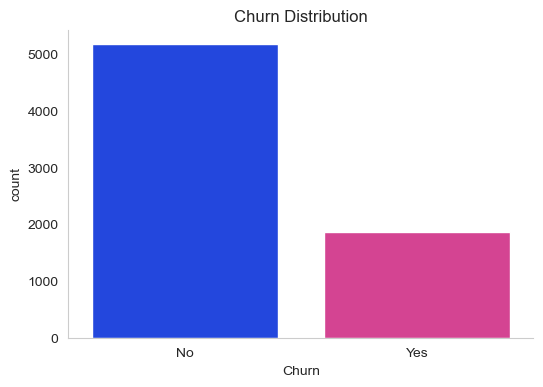

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn', palette=custom_palette)
plt.title('Churn Distribution')
plt.grid(False)
sns.despine()
plt.savefig('Churn.png', dpi=300, bbox_inches='tight')
plt.show()

### Categorical Variables

In [13]:
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                       'PhoneService', 'MultipleLines', 'InternetService',
                       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies',
                       'Contract', 'PaperlessBilling', 'PaymentMethod']

# Dictionary to store percentage tables
summary_tables = {}

for col in categorical_columns:
    # Count table
    count_table = df.groupby([col, 'Churn']).size().unstack(fill_value=0)

    # Convert to percentage row-wise (axis=1)
    percent_table = count_table.div(count_table.sum(axis=1), axis=0) * 100

    # Optional: Round for readability
    percent_table = percent_table.round(2)

    summary_tables[col] = percent_table

# Export to Excel
with pd.ExcelWriter('Churn_Categorical_Summary_Percent.xlsx') as writer:
    for col, table in summary_tables.items():
        table.to_excel(writer, sheet_name=col[:31])

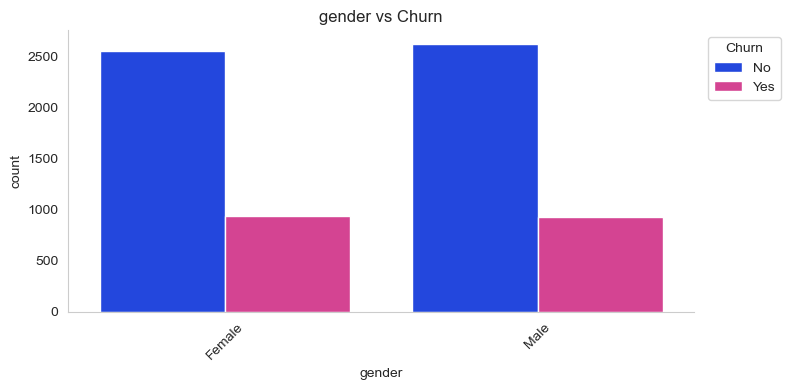

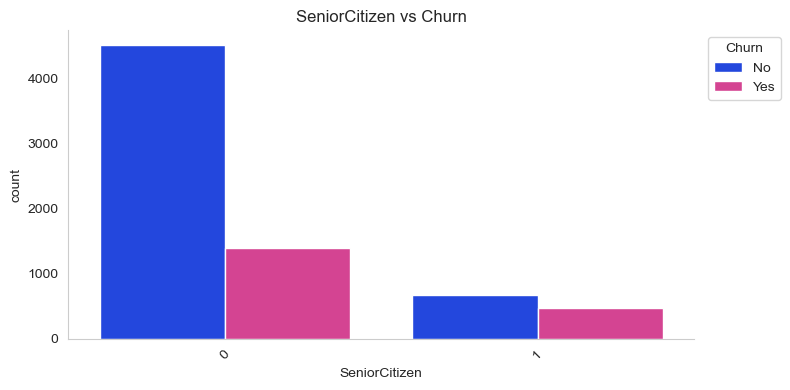

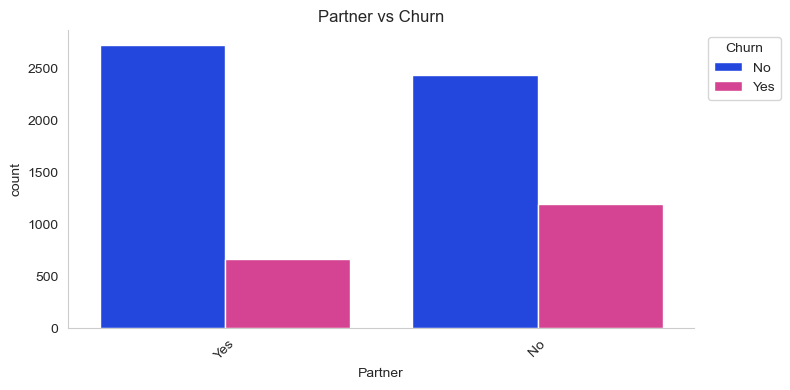

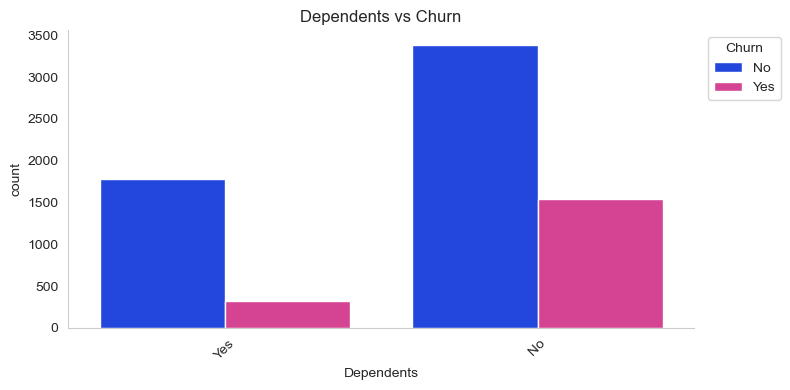

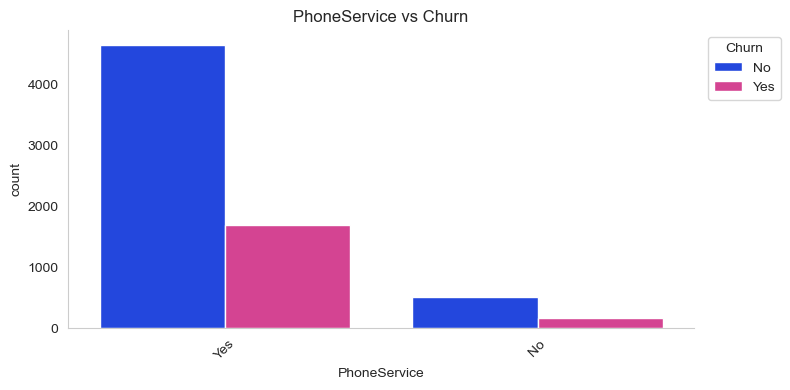

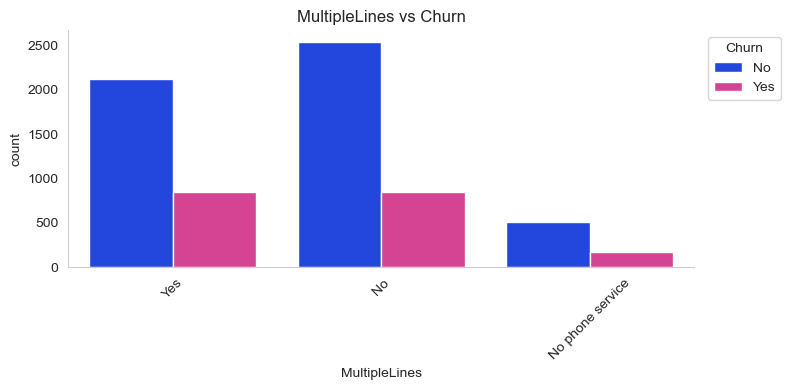

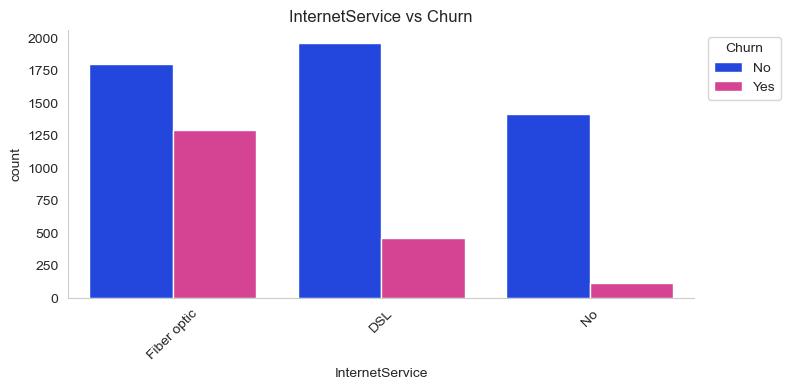

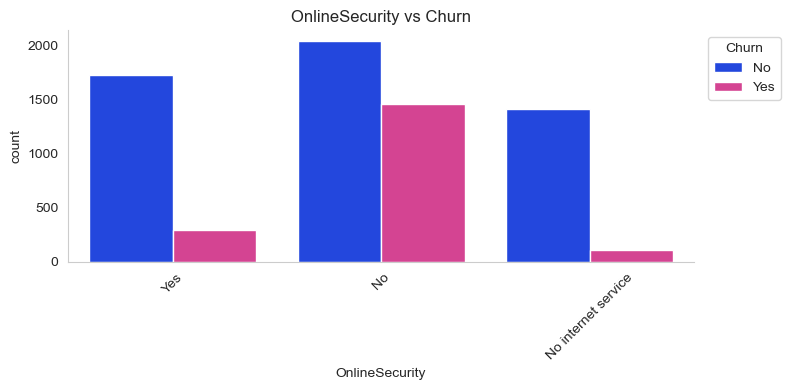

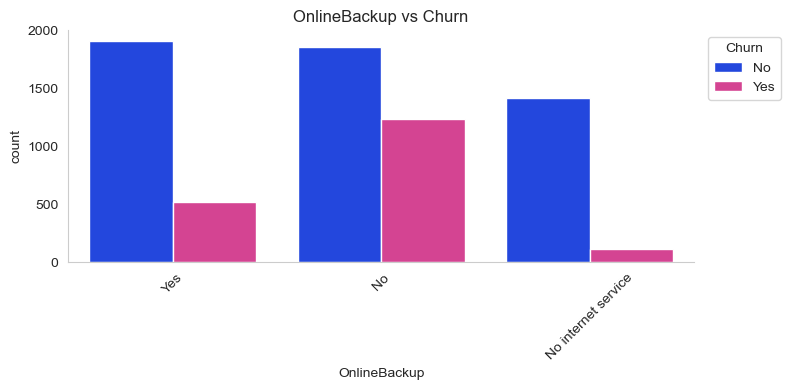

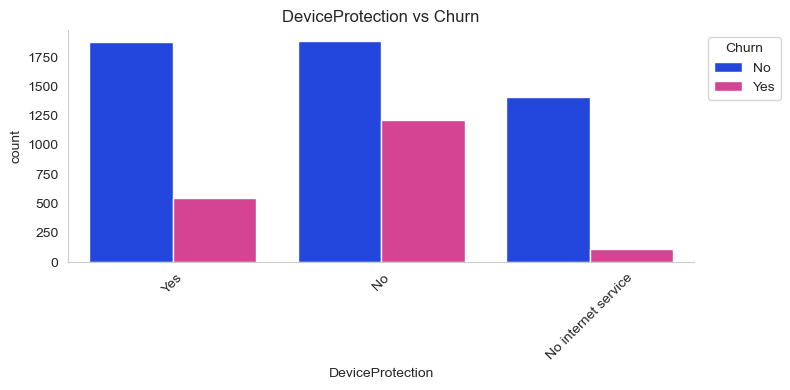

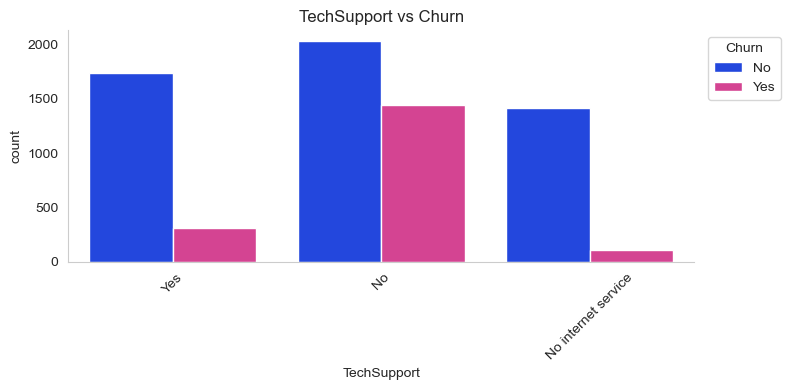

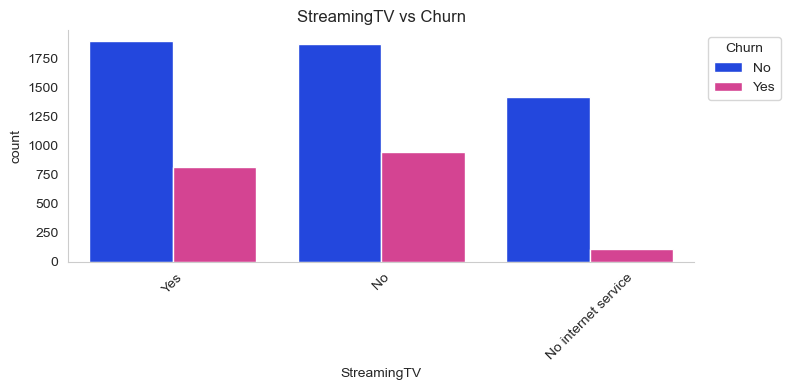

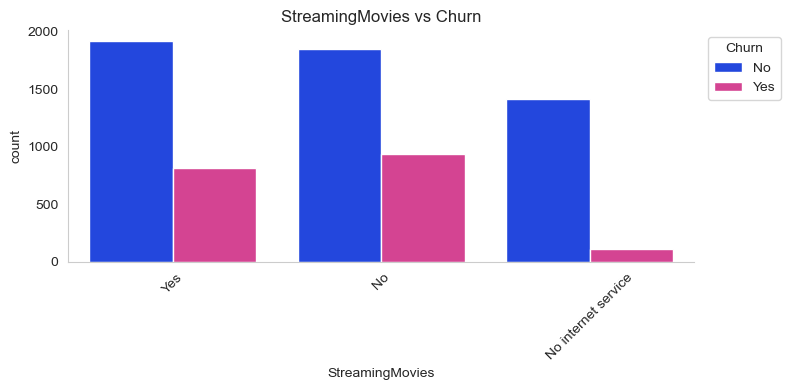

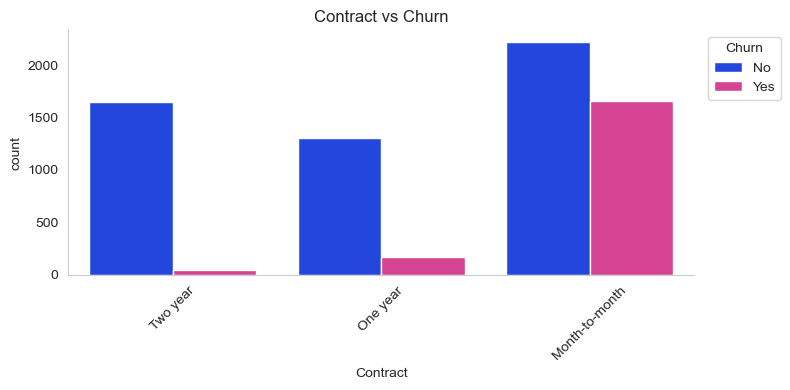

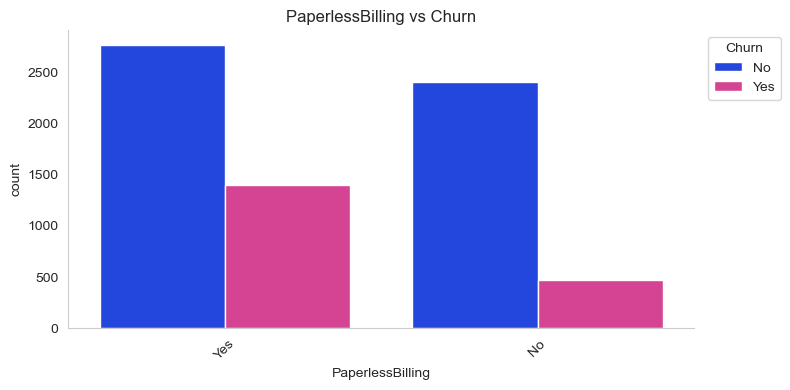

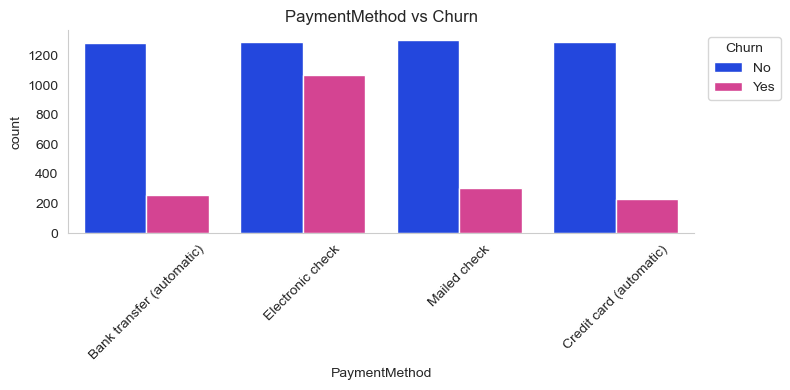

In [14]:
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                       'PhoneService', 'MultipleLines', 'InternetService',
                       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies',
                       'Contract', 'PaperlessBilling', 'PaymentMethod']

for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(data=df, x=col, hue='Churn', palette=custom_palette)
    plt.xticks(rotation=45)
    plt.title(f'{col} vs Churn')
    plt.grid(False)
    plt.legend(title='Churn', loc='upper right', bbox_to_anchor=(1.15, 1))
    sns.despine()
    plt.tight_layout()
    plt.savefig(f'{col}_vs_Churn.png', dpi=300, bbox_inches='tight')
    plt.show()


### Numerical Variables

<Figure size 1200x600 with 0 Axes>

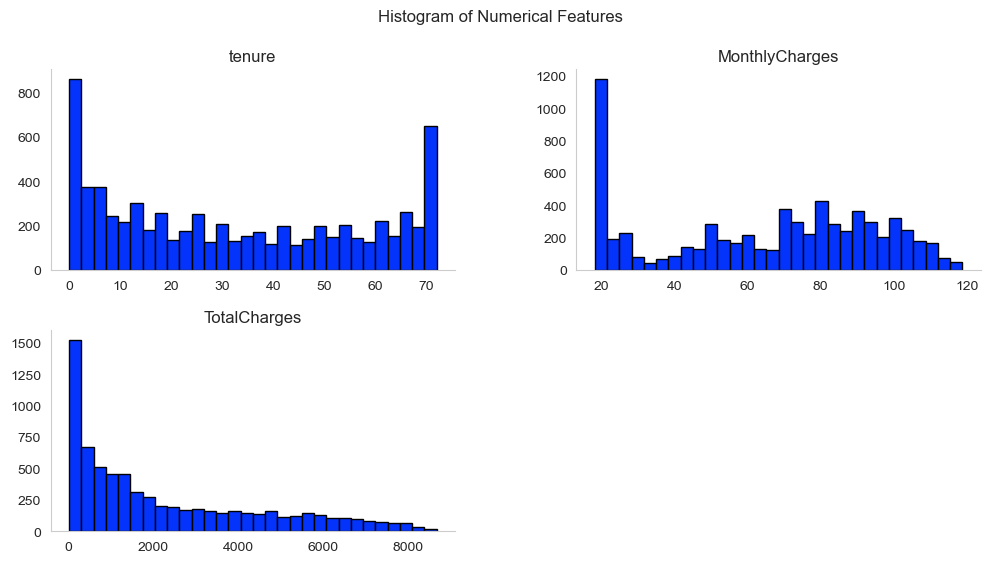

In [15]:
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(12, 6))
axes = df[numerical_columns].hist(bins=30, figsize=(12, 6), color='#0434fc', edgecolor='black')

# Turn off the grid for each subplot
for ax in axes.flatten():
    ax.grid(False)

plt.suptitle('Histogram of Numerical Features')
plt.savefig('Numerical_Histograms.png', dpi=300, bbox_inches='tight')
plt.show()

## Bivariate Analysis

### Churn by Tenure

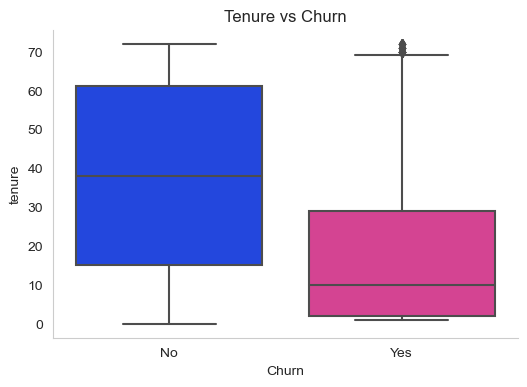

In [16]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Churn', y='tenure', data=df, palette=custom_palette)
plt.title('Tenure vs Churn')
plt.grid(False)
sns.despine()
plt.savefig('Tenure_vs_Churn.png', dpi=300, bbox_inches='tight')
plt.show()

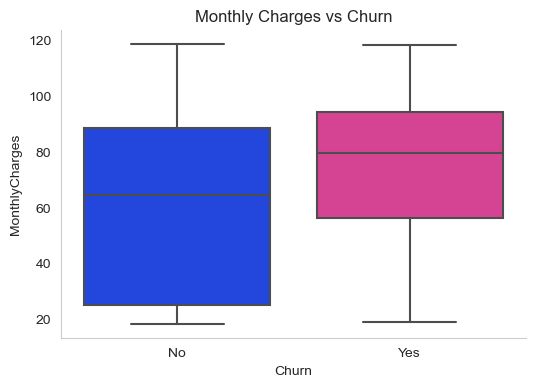

In [17]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette=custom_palette)
plt.grid(False)
plt.title('Monthly Charges vs Churn')
sns.despine()
plt.savefig('MonthlyCharges_vs_Churn.png', dpi=300, bbox_inches='tight')
plt.show()

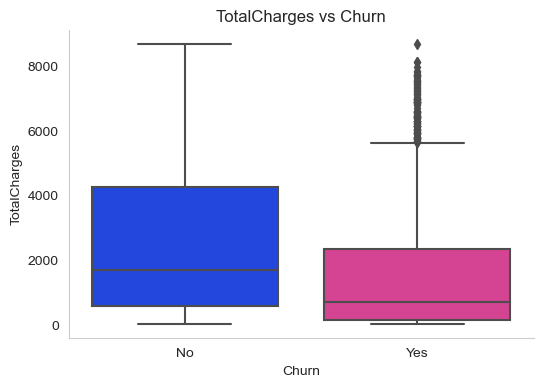

In [18]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Churn', y='TotalCharges', data=df, palette=custom_palette)
plt.grid(False)
plt.title('TotalCharges vs Churn')
sns.despine()
plt.savefig('TotalCharges_vs_Churn.png', dpi=300, bbox_inches='tight')
plt.show()

### Correlation and Heatmap

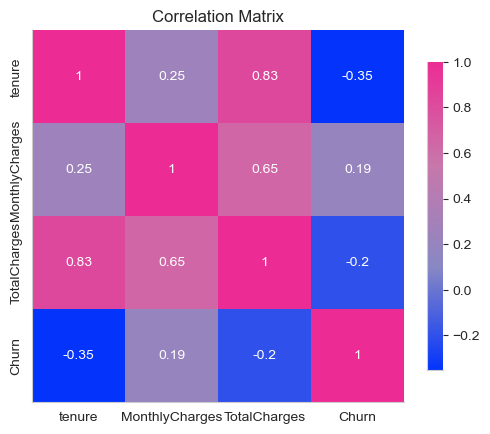

In [19]:
from matplotlib.colors import LinearSegmentedColormap

# Define a custom colormap with more gradient colors between blue and pink
custom_cmap = LinearSegmentedColormap.from_list(
    "custom_cmap",
    ['#0434fc', '#8888c4', '#c877aa', '#ec2c94'],  
    N=256  
)

df_corr = df.copy()
df_corr['Churn'] = df_corr['Churn'].map({'Yes': 1, 'No': 0})
corr = df_corr[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap=custom_cmap, square=True, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix')
sns.despine()
plt.savefig('Correlation_Matrix.png', dpi=300, bbox_inches='tight')
plt.show()

## Machine Learning

### Pre processing

In [20]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Transform target
df_cleaned['Churn'] = df_cleaned['Churn'].map({'Yes': 1, 'No': 0})

# Encode categoricals
categoricals = df_cleaned.select_dtypes(include='object').columns
df_cleaned = pd.get_dummies(df_cleaned, columns=categoricals, drop_first=True)

# Split
X = df_cleaned.drop('Churn', axis=1)
y = df_cleaned['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

C:\Users\digui\AppData\Local\Temp\ipykernel_4140\3704686135.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Churn'] = df_cleaned['Churn'].map({'Yes': 1, 'No': 0})


### Random Forest

In [21]:
# Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluation
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1549
           1       0.63      0.55      0.59       561

    accuracy                           0.79      2110
   macro avg       0.74      0.72      0.73      2110
weighted avg       0.79      0.79      0.79      2110

ROC AUC Score: 0.8291669975109005


### Confusion Matrix and ROC Curve

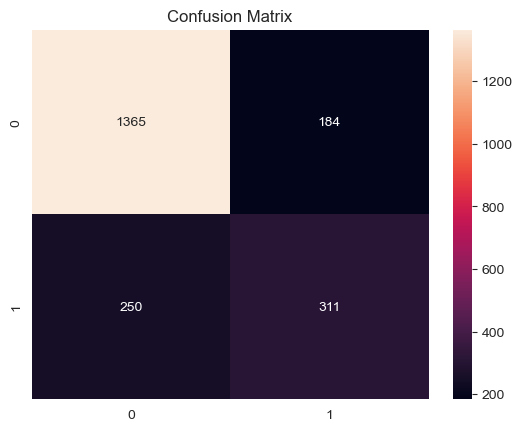

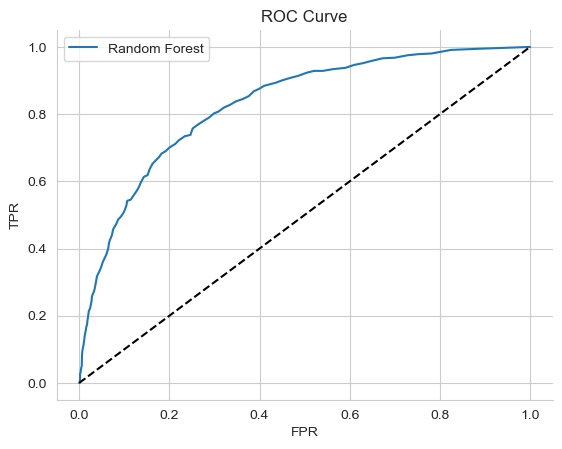

In [22]:
from sklearn.metrics import roc_curve

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.savefig('Confusion_Matrix_RF.png', dpi=300, bbox_inches='tight')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label='Random Forest')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
plt.savefig('ROCCurve_RF.png', dpi=300, bbox_inches='tight')
plt.show()

### Feature Importance

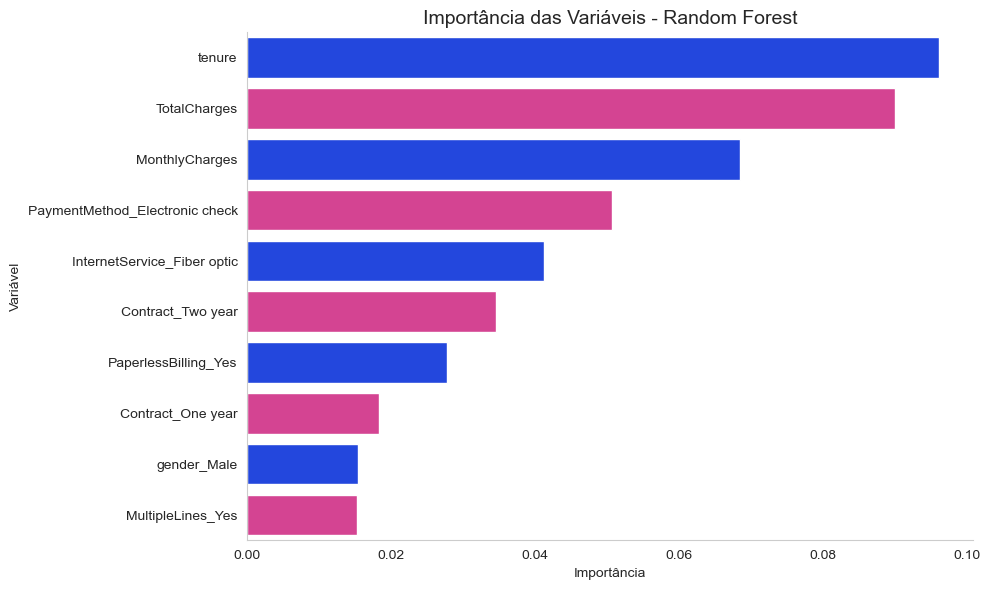

In [23]:
# Feature Importance - Random Forest
rf_importances = model.feature_importances_
rf_features = X_train.columns

rf_df = pd.DataFrame({'Feature': rf_features, 'Importance': rf_importances})
rf_df = rf_df.sort_values(by='Importance', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=rf_df, x='Importance', y='Feature', palette=custom_palette)
plt.title('Importância das Variáveis - Random Forest', fontsize=14)
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.grid(False)
plt.tight_layout()
plt.savefig('Feature_Importance_RF.png', dpi=300, bbox_inches='tight')
plt.show()

### XGBoost

In [24]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

# XGBoost Model
xgb_model = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluation
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_xgb))

C:\Users\digui\anaconda3\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1549
           1       0.59      0.57      0.58       561

    accuracy                           0.78      2110
   macro avg       0.72      0.72      0.72      2110
weighted avg       0.78      0.78      0.78      2110

ROC AUC Score: 0.8136898165569416


### Confusion Matrix and ROC Curve

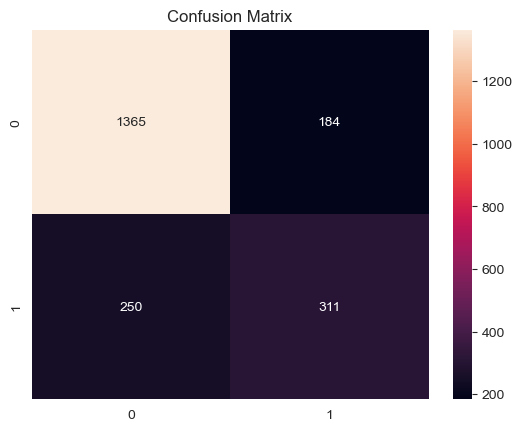

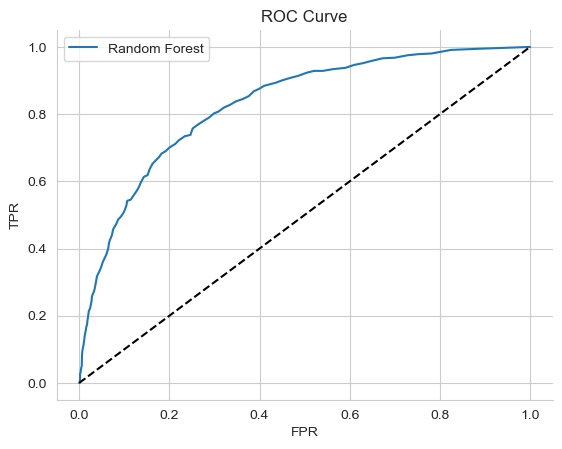

In [25]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.savefig('Confusion_Matrix_XGBoost.png', dpi=300, bbox_inches='tight')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label='Random Forest')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
plt.savefig('ROCCurve_XGBoost.png', dpi=300, bbox_inches='tight')
plt.show()

### Feature Importance

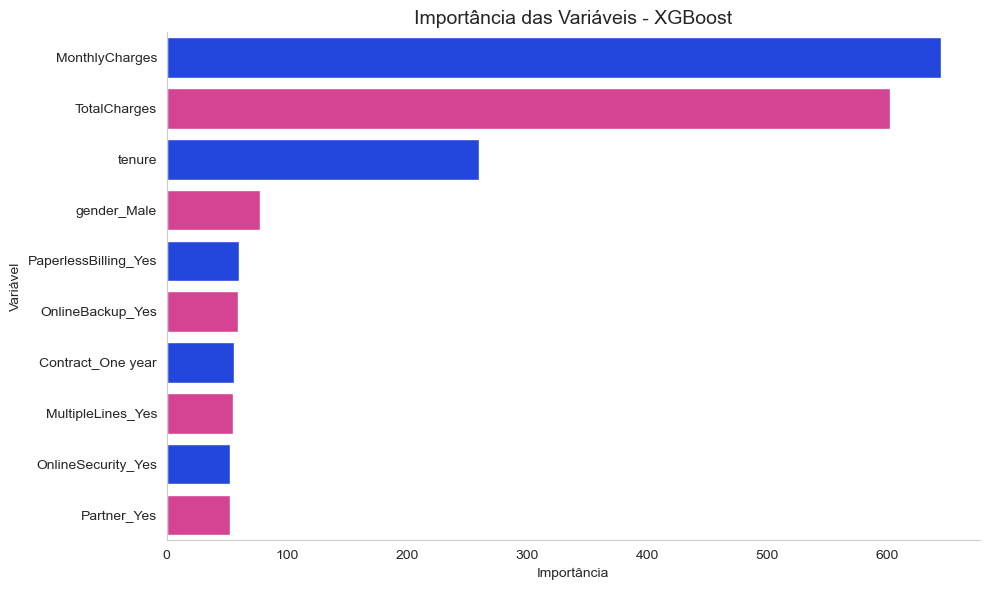

In [26]:
# Feature Importance
xgb_importance_dict = xgb_model.get_booster().get_score(importance_type='weight')
xgb_df = pd.DataFrame.from_dict(xgb_importance_dict, orient='index', columns=['Importance'])
xgb_df = xgb_df.sort_values(by='Importance', ascending=False).head(10).reset_index()
xgb_df.columns = ['Feature', 'Importance']

# Plot com seaborn para controle visual total
plt.figure(figsize=(10, 6))
sns.barplot(data=xgb_df, x='Importance', y='Feature', palette=custom_palette)
plt.title('Importância das Variáveis - XGBoost', fontsize=14)
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.grid(False)
plt.tight_layout()
plt.savefig('Feature_Importance_XGBoost.png', dpi=300, bbox_inches='tight')
plt.show()

### GridSearchCV

In [27]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score

# GridSearch Parameters
param_grid = {
    'n_estimators': [100],
    'max_depth': [3, 5],
    'learning_rate': [0.1],
    'subsample': [1.0],
    'colsample_bytree': [0.8]
}

# Base Model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# GridSearch with K-Fold of 3 folds
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Training
grid_search.fit(X_train_resampled, y_train_resampled)

# Best Model
best_xgb = grid_search.best_estimator_

# Predictions
y_pred_best = best_xgb.predict(X_test)
y_proba_best = best_xgb.predict_proba(X_test)[:, 1]

# Avaliação
print("Melhores Hiperparâmetros:", grid_search.best_params_)
print("Classification Report:")
print(classification_report(y_test, y_pred_best))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_best))

C:\Users\digui\anaconda3\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\digui\anaconda3\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\digui\anaconda3\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Fitting 3 folds for each of 2 candidates, totalling 6 fits
Melhores Hiperparâmetros: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1549
           1       0.59      0.63      0.61       561

    accuracy                           0.78      2110
   macro avg       0.72      0.73      0.73      2110
weighted avg       0.79      0.78      0.79      2110

ROC AUC Score: 0.8254258684517296


### Confusion Matrix and ROC Curve

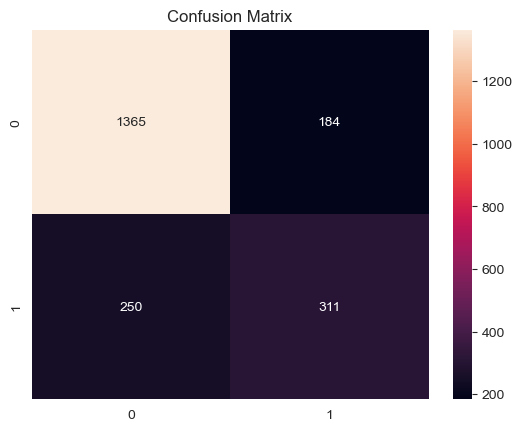

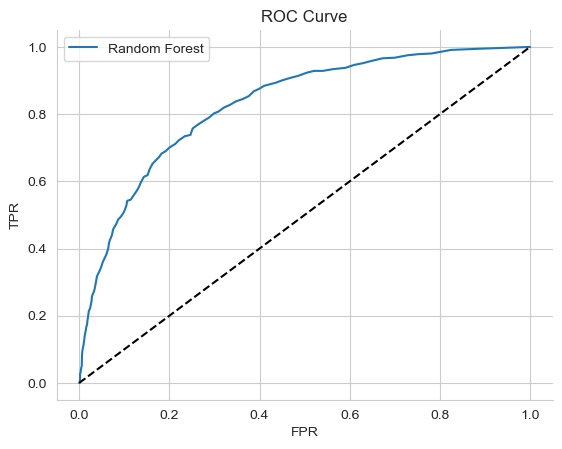

In [28]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.savefig('Confusion_Matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label='Random Forest')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
plt.savefig('ROCCurve.png', dpi=300, bbox_inches='tight')
plt.show()

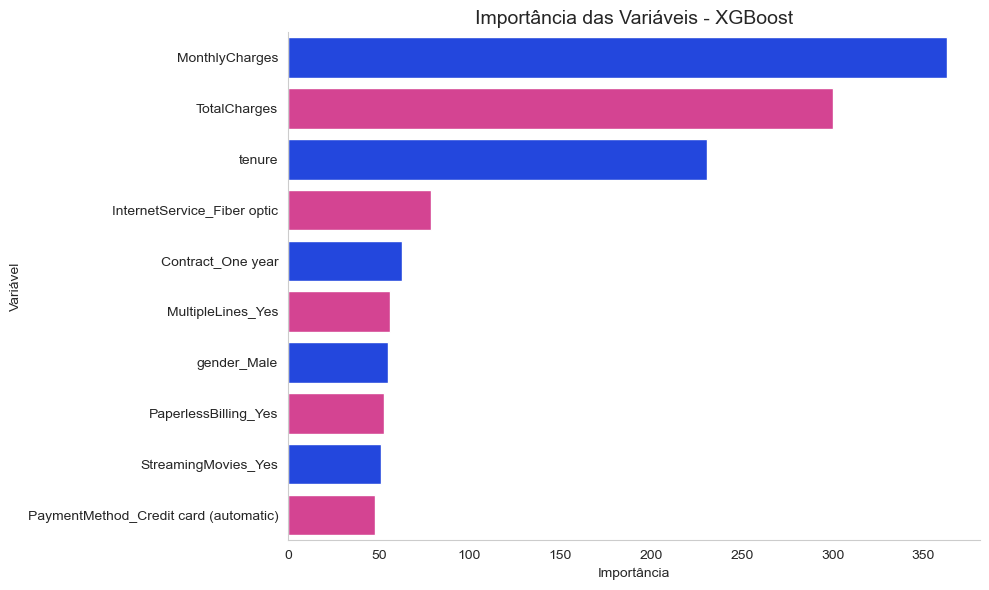

In [29]:
# Feature Importance
xgb_importance_dict = best_xgb.get_booster().get_score(importance_type='weight')
xgb_df = pd.DataFrame.from_dict(xgb_importance_dict, orient='index', columns=['Importance'])
xgb_df = xgb_df.sort_values(by='Importance', ascending=False).head(10).reset_index()
xgb_df.columns = ['Feature', 'Importance']

# Plot 
plt.figure(figsize=(10, 6))
sns.barplot(data=xgb_df, x='Importance', y='Feature', palette=custom_palette)
plt.title('Importância das Variáveis - XGBoost', fontsize=14)
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.grid(False)
plt.tight_layout()
plt.savefig('Feature_Importance_XGBoost.png', dpi=300, bbox_inches='tight')
plt.show()